# PART 1:  Discriminant Analysis on predicting Clusters derived from K-means clustering: Python analysis (In Class Exercise)

## Getting external libraries

In [2]:
import pandas as pd  # data frame operations  
import numpy as np  # arrays and math functions
import matplotlib.pyplot as plt  # static plotting
import scikitplot as scplt
import seaborn as sb
from sklearn.cluster import KMeans
from sklearn.preprocessing import scale
from sklearn.model_selection import train_test_split
#from sklearn import metrics, cross_validation
#from sklearn.cross_validation import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn import metrics
#from sklearn.datasets import load_digits
#from sklearn.decomposition import PCA
#from collections import Counter
#import seaborn as sns  # pretty plotting, including heat map
   
np.set_printoptions(precision=3)

# read in comma-delimited text file, creating a pandas DataFrame object. Perform EDA and generate a heatmap of correlation matrix

   Unnamed: 0  Duration  Amount  InstallmentRatePercentage  ResidenceDuration  \
0           1         6    1169                          4                  4   
1           2        48    5951                          2                  2   
2           3        12    2096                          2                  3   
3           4        42    7882                          2                  4   
4           5        24    4870                          3                  4   

   Age  NumberExistingCredits  NumberPeopleMaintenance  Telephone  \
0   67                      2                        1          0   
1   22                      1                        1          1   
2   49                      1                        2          1   
3   45                      1                        2          1   
4   53                      2                        2          1   

   ForeignWorker  ... OtherInstallmentPlans.Bank  \
0              1  ...                         

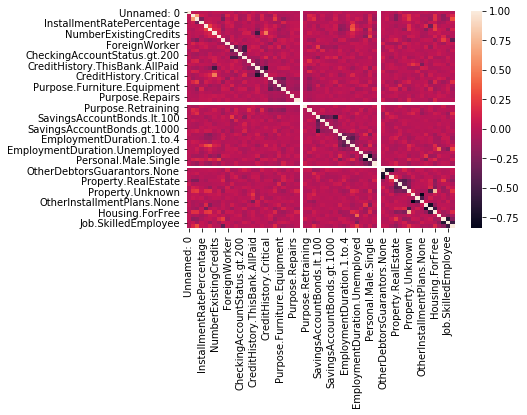

In [3]:
GC_data = pd.read_csv('c:\\run\\GermanCredit.csv')
print(GC_data.head())
sb.heatmap(GC_data.corr())


#np.array(df.to_array()) could use this potentially to covnvert df to array
GC_data_array=GC_data.values
#GC_data_array2=GC_data.as_matrix()

print('\nDescriptive statistics for German Credit data ---------------')
print(GC_data.describe())

# examine the structure of the DataFrame object
print('\nContents of Initial Data  ---------------')

# could use len() or first index of shape() to get number of rows/observations
print('\nNumber of Respondents =', len(GC_data)) 



# K-means clustering on scaled variables 1, 2 and 5 from GermanCredit data set.

Centers for the clusters are: 
[[-0.025  0.019]
 [-0.003  0.002]
 [-1.035  0.807]]
Cluster Indicators for each data row are:
[1 0 1 1 1 1 1 0 1 0 0 1 0 1 1 0 1 1 0 0 1 1 1 1 0 0 1 1 0 1 1 0 0 1 0 0 1
 0 0 1 0 0 1 1 1 1 1 0 1 0 0 0 0 0 1 0 0 0 0 1 0 1 1 0 1 1 0 0 1 1 0 0 1 0
 1 1 1 1 0 0 0 1 1 1 1 0 0 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 1 0 0 0 0
 1 1 0 0 0 1 1 1 1 0 0 0 1 1 0 0 0 0 0 0 1 1 1 1 0 0 1 0 0 0 0 0 0 1 0 1 1
 0 1 1 1 0 1 1 1 1 0 1 0 1 0 1 1 1 0 0 0 1 1 1 0 0 0 0 0 0 1 0 1 0 0 0 1 1
 0 1 1 0 1 1 1 0 0 1 1 0 1 1 1 0 1 1 1 0 1 1 1 0 0 0 1 1 1 0 1 0 0 0 1 0 1
 0 1 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 1 0 0 1 0 1 0 1 0 0 1 1 0 0 1 0 0 0 0 1
 1 0 1 1 1 1 1 1 1 1 0 1 1 1 1 0 0 0 1 1 1 1 0 1 1 0 0 1 1 1 1 0 1 1 1 0 0
 1 0 1 0 1 0 0 1 0 0 1 1 1 1 1 0 1 1 0 1 1 1 0 1 0 1 0 0 1 1 1 1 0 1 1 0 0
 1 1 1 1 0 1 0 1 1 1 0 0 0 1 1 0 1 1 0 1 0 1 0 1 0 0 1 1 1 0 0 0 1 0 1 0 1
 1 1 1 1 1 1 1 1 0 1 1 1 1 0 0 0 0 1 1 0 0 1 1 1 1 1 1 0 0 0 1 1 0 0 1 0 1
 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 1 1 0 1 0 1 1 1 1 1

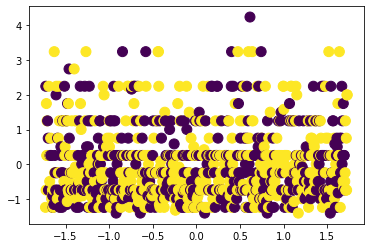

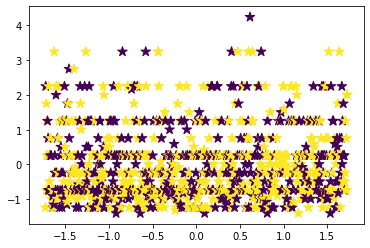

In [4]:

sel= [0,1,4]
GC_data_for_cluster=scale(GC_data_array[:,sel])
#Fixing number of clusters at 2
k=2
#This is where K-means clustering is executed
x=KMeans(n_clusters=k, n_init=100, max_iter=300, tol=0.0001, verbose=0).fit(GC_data_for_cluster)
#x.pred = KMeans(n_clusters=k, n_init=10, max_iter=300, tol=0.0001, verbose=0).predict(GC_data_for_cluster)

x.fit_predict(GC_data_for_cluster)

centroids = x.cluster_centers_
labels = x.labels_

#Printing the cluster centers and cluster indicators
print('Centers for the clusters are: ') 
print(centroids.T)
print('Cluster Indicators for each data row are:') 
print(labels)


#Computing cluster sizes - absolute values and proportions
centroids_dataframe = pd.DataFrame(data=centroids)
centroids_matrix = centroids_dataframe.values
#centroids_matrix = centroids_matrix.transpose()

print(centroids_matrix)
print("The cluster sizes are", np.bincount(labels))
print("The cluster proportions are", np.bincount(labels)/len(labels))


#Computing R-square for the solution

shap = (len(GC_data_for_cluster),k)
cluster_matrix = np.zeros(shap)

for i in range(k):     
    cluster_matrix[x.labels_ == i,i]=1.0

predicted_data= np.dot(cluster_matrix,centroids_matrix)
shap2 = (len(GC_data_for_cluster)*3,1)

print ("The R-Square for", k, "clusters is", (np.corrcoef(predicted_data.ravel(), GC_data_for_cluster.ravel())[0,1])**2)

#Generating scatter plots.
plt.scatter(GC_data_for_cluster[:, 0], GC_data_for_cluster[:, 1], c=labels, s=100, cmap='viridis')
plt.show()



colors = ["g.","r.","c.","y."]
plt.scatter(GC_data_for_cluster[:, 0], GC_data_for_cluster[:, 1], marker="*", c=labels, s=100, cmap='viridis')
plt.show()




# Use Discriminant Analysis to predict the 2-cluster variable and predict it using the variables used for cluster analysis

The coefficients are [[ 0.015 -0.348 11.199]]
The Intercept is [1.528]
The scalings are [[ 0.003]
 [-0.077]
 [ 2.466]]
The classes are [0 1]
The means are [[-0.025 -0.003 -1.035]
 [ 0.019  0.002  0.807]]
The xbars are [-3.641e-17  1.099e-16 -9.133e-16]
The VAFs are [1.]
The mean accuracy of the model is 1.0
The Decision Function is [ 13.658  -7.859   3.333  12.618  13.138  12.792  13.138  -7.512  13.485
  -7.339 -16.971  12.445 -16.971  13.139  13.399  -7.165  13.139   2.814
  -7.165  -7.165  13.573   3.507   3.392  13.486 -16.912  -6.645  13.659
   3.334  -6.673  12.1     3.161  -7.164  -6.991  13.487 -16.97   -7.771
   2.295  -6.991  -6.76    3.421  -7.337 -16.969  13.314  12.967  12.447
  13.516  12.794  -6.644  13.516  -6.817  -7.163  -7.25   -6.817 -17.142
  12.794  -6.643 -16.968  -7.51   -6.99   12.795 -16.882  13.401  12.795
  -7.856  13.141  13.055  -6.816 -16.968  12.795  12.795  -7.509  -6.671
  13.604 -17.834  12.795  13.489   2.47   13.518  -8.029 -17.487 -17.314
   3.25  

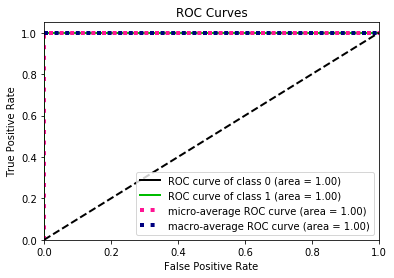

The AUC Value for the model is 1.0
The thresholds tried are, [2.000e+00 1.000e+00 8.558e-01 1.387e-08]


In [5]:
LDA = LinearDiscriminantAnalysis(n_components=None, priors=None, shrinkage=None,
              solver='svd', store_covariance=False, tol=0.0001)
my_results=LDA.fit(GC_data_for_cluster, labels)

print("The coefficients are", my_results.coef_)
print("The Intercept is", my_results.intercept_)
print("The scalings are", my_results.scalings_)
print("The classes are", my_results.classes_)
print("The means are", my_results.means_)
print("The xbars are", my_results.xbar_)
print("The VAFs are", my_results.explained_variance_ratio_)
print("The mean accuracy of the model is", my_results.score(GC_data_for_cluster,labels))
print("The Decision Function is", my_results.decision_function(GC_data_for_cluster))
print(LDA.predict(GC_data_for_cluster))


my_results.get_params()
my_results.predict(GC_data_for_cluster)
my_results.predict_log_proba(GC_data_for_cluster)
my_results.predict_proba(GC_data_for_cluster)

### Train-test split of the data 70:30, then perform Discriminant Analysis
#on the training data, predictions on the test data
### Computing and printing the classification table

pr_train, pr_test, resp_train, resp_test = train_test_split(
        GC_data_for_cluster, labels, test_size=0.3, random_state=31171)

my_results_train = LDA.fit(pr_train,resp_train)
predictions_test=my_results_train.predict(pr_test)
predictions_test_prob=my_results_train.predict_proba(pr_test)

print("The Classification table is", confusion_matrix(resp_test, predictions_test))
print(classification_report(resp_test, predictions_test))

fpr, tpr, tholds = metrics.roc_curve(resp_test, predictions_test_prob[:,1])
scplt.metrics.plot_roc(resp_test, predictions_test_prob)
plt.show()

print("The AUC Value for the model is", metrics.auc(fpr, tpr))
print("The thresholds tried are,", tholds)




# PART 2: We will now perform Linear Discriminant Analysis on Default Data, that we had earlier used for Logistic Regression. We will first do LDA on full data, then to LDA on train and test split data.

   default  student      balance       income
0        1        1   729.526495  44361.62507
1        1        0   817.180407  12106.13470
2        1        1  1073.549164  31767.13895
3        1        1   529.250605  35704.49394
4        1        1   785.655883  38463.49588
The coefficients are [[-3.663e-01 -4.705e-03 -7.061e-06]]
The Intercept is [9.846]
The scalings are [[-1.747e-01]
 [-2.244e-03]
 [-3.367e-06]]
The classes are [0 1]
The means are [[6.186e-01 1.748e+03 3.209e+04]
 [7.086e-01 8.039e+02 3.357e+04]]
The xbars are [7.056e-01 8.354e+02 3.352e+04]
The VAFs are [1.]
The mean accuracy of the model is 0.9724
The Decision Function is [5.734 5.916 4.205 ... 5.088 1.839 8.781]
[1 1 1 ... 1 1 1]
The Classification table is [[  24   70]
 [   4 2902]]
              precision    recall  f1-score   support

           0       0.86      0.26      0.39        94
           1       0.98      1.00      0.99      2906

    accuracy                           0.98      3000
   macro avg   

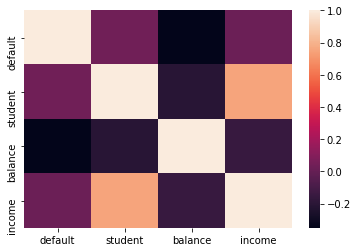

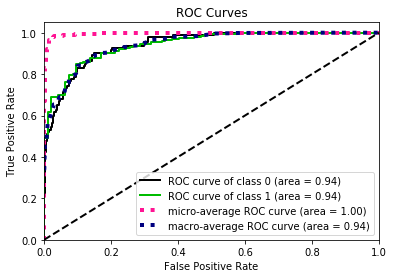

The AUC Value for the model is 0.9431330629219078
The thresholds tried are, [2.    1.    0.996 0.996 0.992 0.992 0.988 0.988 0.988 0.988 0.988 0.988
 0.988 0.987 0.981 0.981 0.977 0.976 0.975 0.975 0.963 0.963 0.961 0.96
 0.96  0.96  0.96  0.96  0.952 0.952 0.951 0.951 0.95  0.95  0.939 0.939
 0.939 0.938 0.937 0.937 0.933 0.933 0.924 0.924 0.918 0.918 0.915 0.915
 0.912 0.911 0.905 0.903 0.896 0.896 0.879 0.879 0.872 0.87  0.87  0.869
 0.859 0.858 0.857 0.857 0.847 0.846 0.832 0.826 0.824 0.824 0.822 0.822
 0.818 0.818 0.81  0.809 0.804 0.804 0.802 0.801 0.76  0.76  0.756 0.756
 0.732 0.73  0.73  0.728 0.727 0.724 0.722 0.717 0.67  0.667 0.665 0.663
 0.644 0.641 0.63  0.629 0.624 0.611 0.603 0.566 0.54  0.536 0.531 0.467
 0.459 0.427 0.422 0.422 0.415 0.107]


In [6]:
Default=pd.read_csv(r'C:\Users\anilc\OneDrive\Desktop\Anil\Data Mining\Data sets\Default.csv')

Default['student'] = pd.get_dummies(Default['student'])
Default['default'] = pd.get_dummies(Default['default'])
print(Default.head())
sb.heatmap(Default.corr())

X = Default[['student', 'balance', 'income']]
y = Default['default']


LDA = LinearDiscriminantAnalysis(n_components=None, priors=None, shrinkage=None,
              solver='svd', store_covariance=False, tol=0.0001)
my_results=LDA.fit(X,y)

print("The coefficients are", my_results.coef_)
print("The Intercept is", my_results.intercept_)
print("The scalings are", my_results.scalings_)
print("The classes are", my_results.classes_)
print("The means are", my_results.means_)
print("The xbars are", my_results.xbar_)
print("The VAFs are", my_results.explained_variance_ratio_)
print("The mean accuracy of the model is", my_results.score(X,y))
print("The Decision Function is", my_results.decision_function(X))
print(LDA.predict(X))


my_results.get_params()
my_results.predict(X)
my_results.predict_log_proba(X)
my_results.predict_proba(X)

### Train-test split of the data 70:30, then perform Discriminant Analysis
#on the training data, predictions on the test data
### Computing and printing the classification table

pr_train, pr_test, resp_train, resp_test = train_test_split(
        X, y, test_size=0.3, random_state=31171)

my_results_train = LDA.fit(pr_train,resp_train)
predictions_test=my_results_train.predict(pr_test)
predictions_test_prob=my_results_train.predict_proba(pr_test)

print("The Classification table is", confusion_matrix(resp_test, predictions_test))
print(classification_report(resp_test, predictions_test))

fpr, tpr, tholds = metrics.roc_curve(resp_test, predictions_test_prob[:,1])
scplt.metrics.plot_roc(resp_test, predictions_test_prob)
plt.show()

print("The AUC Value for the model is", metrics.auc(fpr, tpr))
print("The thresholds tried are,", tholds)
